## Some Physical constants

There are a few constants we will use:
* $c$ the speed of light:  $c = 2.997 \times 10^{8}$ m/s
* $h$ Planck's constant: $h = 6.626 \times 10^{-34}$ J$\cdot$s
* $k$ the Boltzman constant:  $k = 1.381 \times 10^{-23}$ J/K
* $\sigma_{SB}$ the Stefan-Boltzman constant: $\sigma_{SB} = 5.670 \times 10^{-8}$ W/m^2/K^4

In python programs these constants are conveniently accessed like this:

In [20]:
from scipy import constants
h = constants.h
print " h = %.3e Joule second"%h
c = constants.c
print " c = %.3e meters/second"%c
k = constants.k
print " k = %.3e Joule/K"%k
sb = constants.Stefan_Boltzmann
print "sb = %.3e W/m^2/K^4"%sb


 h = 6.626e-34 Joule second
 c = 2.998e+08 meters/second
 k = 1.381e-23 Joule/K
sb = 5.670e-08 W/m^2/K^4


## Wavelength and Frequency

The wave equation (speed = wavelength $\times$ frequency) for light is  $$ c = \lambda\nu$$
where:

* $c$ is the speed of light, in meters/second
* $\lambda$ is the wavelength, in meters
* $\nu$ is the frequency light, in Hz, or cycles/sec

Here is a table relevant for astronomy.  For convenience later, we express the frequency $\nu$ in GHz ($10^9$ Hz) and the wavelength $\lambda$ in cm.  The wavelenths range from 300 meters (3 football fields) to 300 nm ($300 \times 10^{-9}$ meters), shorter than blue light.

In [21]:
from ipy_table import *  # import a python package that makes tables look nice
import numpy as np
nus = np.logspace(6, 15, 10) # Define 10 frequencies, from 10^6 to 10^15, logarithmically spaced
lines = [['Frequency (GHz)', "Wavelength (cm)"]]
for nu in nus:
    lam = c/nu
    nug = nu/1e9
    lamcm =lam*1e2
    lines.append([nug, lamcm])
make_table(lines)
apply_theme('basic')
set_global_style(float_format='%.1e')

Frequency (GHz),Wavelength (cm)
1.0e-03,3.0e+04
1.0e-02,3.0e+03
1.0e-01,3.0e+02
1.0e+00,3.0e+01
1.0e+01,3.0e+00
1.0e+02,3.0e-01
1.0e+03,3.0e-02
1.0e+04,3.0e-03
1.0e+05,3.0e-04
1.0e+06,3.0e-05


### Planck's Law for Black Body Radiation

The spectral energy distribution depends on the temperature of the object that is shining. 
For an object at temperature T, it is

$$B_\nu(T) = \frac{2h\nu^3/c^2}{e^{h\nu/kT}-1}$$
in units of Watts/Hz/m^2/sr, or
$$B_\lambda(T) = \frac{2hc^2/\lambda^5}{e^{hc/\lambda k T}-1}$$
in units of Watts/m^3/sr, where:

* $T$ is the temperature in Kelvin
* $\nu$ is the frequency in Hz
* $\lambda$ is the wavelength in meters

Note the units!  

1. Watts measures power: Energy/Time.  
2. sr measures solid angle, Steradians.  If we capture all of the energy around an object by surrounding it in a sphere, we are collecting over $4\pi$ Steradians.
3. For $B_\nu$, /Hz is because this is a spectral density.  The amount of energy measured in one frequency bin depends on the width of the bin.
4.  For $B_\nu$, /m^2 is per unit area on the surface that is emitting the radiation.  The total power we see integrates over the surface of the astronomical object.
5.  For $B_\lambda$ instead of /Hz we have /m, which has to do with the resolution of the spectrum we are measureing.  This combines with the /m^2 over the surface of the astronomical object, resulting in /m^3.

In different circumstances, we may want to express this as a function of either frequency ($\nu$) or wavelength ($\lambda.$)  We can work out these values at a specific temperature.

What are $B_\lambda(T)$ and $B_\nu(T)$  for $\lambda$ = 1 micron, from an object at temperature $T$ = 213 K?

In [22]:
import math 
t = 213          # Kelvin
lmbda = 10e-6 # 10 microns
nu = c/lmbda
bLambda = (2*h*c**2/lmbda**5)/(math.exp(h*c/(lmbda*k*t)))
print "bLambda=%.3e Watts/m^3/sr"%bLambda
#$$B_\nu(T) = \frac{2h\nu^3/c^2}{e^{h\nu/kT}-1}$$
bNu = (2*h*nu**3/c**2)/(math.exp(h*nu/(k*t))-1)
print "    bNu=%.3e Watts/Hz/m^2/sr"%bNu

bLambda=1.388e+06 Watts/m^3/sr
    bNu=4.635e-13 Watts/Hz/m^2/sr


Here is the Planck distribution for four typical temperatures:  The photosphere of the Sun (5778 K), room temperature (300 K), the temperature of liquid nitrogen (77 K), and the temperature of the cosmic microwave background (CMB) (3 K).

Sun 20091943.0032
room 146.014775928
Liquid Nitrogen 0.6336868401
CMB 1.46014775928e-06


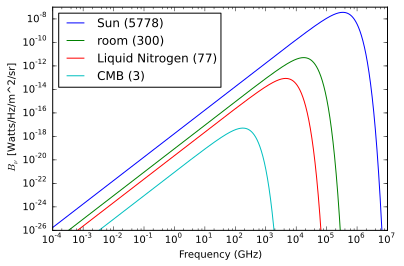

In [23]:
%matplotlib inline

import warnings
import matplotlib.pyplot as plt
nus = np.logspace(5, 16, 10000)
dnus = nus[1:]-nus[:-1]
bNu = {}
bNuSum = {}
tnameList = [[5778, "Sun"],[300, "room"], [77, "Liquid Nitrogen"], [3, "CMB"]]
for t,name in tnameList:
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        bNu[name] = (2*h*np.power(nus,3)/c**2)/(np.exp(h*nus/(k*t))-1)
    plt.loglog(nus/1e9,bNu[name],label="%s (%d)"%(name,t))
    bNuSum[name] = (bNu[name][1:] * dnus).sum()
plt.ylim(ymin=1e-26)
plt.xlim(xmax=1e7)
plt.legend(loc='best')
plt.xlabel("Frequency (GHz)")
l = plt.ylabel(" $B_\\nu$ [Watts/Hz/m^2/sr]")

Sun 20091943.0032
room 146.014775928
Liquid Nitrogen 0.6336868401
CMB 1.46014775928e-06


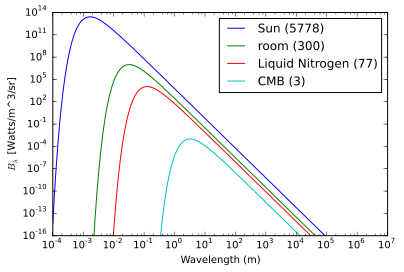

In [24]:
lam0 = c/nus[0]
lam1 = c/nus[-1]
lams = np.logspace(math.log10(lam1), math.log10(lam0), 10000)
dlams = lams[1:]-lams[:-1]
bLambda = {}
bLambdaSum = {}
for t,name in tnameList:
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        bLambda[name] = (2*h*c**2/np.power(lams,5))/(np.exp(h*c/(lams*k*t))-1)
    plt.loglog(nus/1e9,bLambda[name],label="%s (%d)"%(name,t))
    bLambdaSum[name] =  (bLambda[name][1:]*dlams).sum()
plt.ylim(ymin=1e-16)
#plt.xlim(xmax=1e7)
plt.legend(loc='best')
plt.xlabel("Wavelength (m)")
l = plt.ylabel("$B_\lambda$ [Watts/m^3/sr]")

The numerical values of $B_\nu$ and $B_\lambda$ differ, but when we add up the energy in each bin (of frequency or wavelength) we get the total energy radiated by the astronomical object.  This total is given by the Stefan-Boltzman law:
$$j^\star = \sigma T^4$$

is the total amount of energy emitted by a blackbody at temperature T (Kelvin).

As above, $\sigma_{SB}$ is the Stefan-Botltzman constant:
$$\sigma = \frac{2 \pi^5 k^4}{15 c^2 h^3} = 5.670 \times 10^{-8}$$
is in units of W/m$^2$/K$^4$.

The radiance $L$: $$L = j^\star/\pi$$
is in units of W/m^2/sr.

For the four example temperatures above, let's do the sums and compare.

In [25]:
lines = [['Object', "T (Kelvin)","$\sigma_{SB} T^4/\pi$","$\sum B_\nu \Delta\nu$", "$\sum B_{\lambda} \Delta\lambda$"]]

for t,name in tnameList:
    jStar = sb*t**4
    radiance = jStar/math.pi
    line = [name, t, radiance, bNuSum[name], bLambdaSum[name]]
    lines.append(line)
make_table(lines)
apply_theme('basic')
set_global_style(float_format='%.3e')

Object,T (Kelvin),$\sigma_{SB} T^4/\pi$,$\sum B_ u \Delta u$,$\sum B_{\lambda} \Delta\lambda$
Sun,5778,2.012e+07,2.009e+07,2.009e+07
room,300,1.462e+02,1.460e+02,1.460e+02
Liquid Nitrogen,77,6.345e-01,6.337e-01,6.337e-01
CMB,3,1.462e-06,1.460e-06,1.460e-06


### Rayleigh-Jeans Approximation

Radio telescopes measure photons with energies much lower than where the spectrum peaks.  It will be convenient for us to use the Rayleigh-Jeans approximation of the Planck distribution.

At low energies, $\lambda$ is large so $hc/\lambda kT \rightarrow 0$.  

Since 
$e^x = 1 + x + \frac{x^2}{2!} + ...$ implies that $ e^{hc/\lambda kT} -1 \rightarrow hc/\lambda kT$
the specific intensity of a black body radiator at low energy is given by


$B_\lambda(T) = \frac{2ckT}{\lambda^4}$ Watts/m$^3$/sr

or

$B_{\nu}(T) = \frac{2 {\nu}^2 kT}{c^2}$ Watts/Hz/m$^2$/sr

###  Brightness Temperature

Using the Raleigh-Jeans approximation, we define the brightness temperature as $T_B = B_{\nu}(T) c^2 / 2 k {\nu}^2 = B_\lambda(T)$
